<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPITULO 5 - HANDS ON MACHINE LEARNING
## Support Vector Machines
En este archivo se encuentran los ejemplos propuestos en el capitulo y algunas anotaciones tomadas del mismo.

En este capitulo el libro el algoritmo Support Vector Machine, el cual puede ser utilizado tanto para tareas de clasificacion como de regresion.

## SVM como clasificador

La idea basica de todo algoritmo clasificador es poder separar en el espacio de features las distintas clases presentes en el problema. En particular el metodo de SVM busca separar las clases maximizando la distancia entre cada una de las clases y la frontera de clasificacion entre ellas. Esto se suele llamar "Large margin classification". La figura 5.1 del libro ejemplifica esto de forma muy clara. En realidad, la distancia que busca maximizar no es la de toda la clase (el centro de masa por ejemplo) sino la de "la instancia mas cercana". Esto significa que agregar instancias nuevas a una de las clases puede no cambiar en lo absoluto el resultado del algoritmo si no cambia la instancia mas cercana. A estas instancias se las llama "support vectors" y de ahi el nombre del algoritmo.

## Hard margin classification
Tal como explique recien, el algoritmo no permite que haya instancias que queden del lado incorrecto de la frontera entre clases. O sea, el clasificador debe lograr una clasificacion perfecta. Esto solo es posible cuando la division entre clases es lineal. En cualquier otro caso no se podra realizar. Aunque es algo deseable no siempre es posible.

## Soft margin classification
Una posible solucion para los problemas que no son separables linealmente es permitr que queden instancias "del lado correcto". A estas instancias las llamamos "margin violations" porque justamente violan la frontera encontrada. En general uno busca la minima cantidad de violaciones pero a su vez tratando de mantener la mayor generalizacion posible del algoritmo. En general las implementaciones de metodos SVM cuentan con un parametro que permite elegir entre estas dos situaciones, donde uno prefiere mas o menos cantidad de violaciones a la frontera. En Sklearn el hiperparametro que regula esto es $C$. Cuanto mas bajo es el valor de $C$ mas violaciones permitimos y cuanto mas alto, menos. El libro presenta un ejemplo de implementacion utilizando $LinearSVC$ de sklearn para el dataset de iris.



   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
[0 1 2]


Text(0, 0.5, 'petal width (cm)')

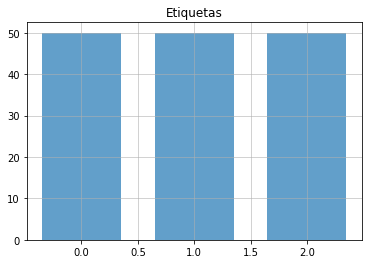

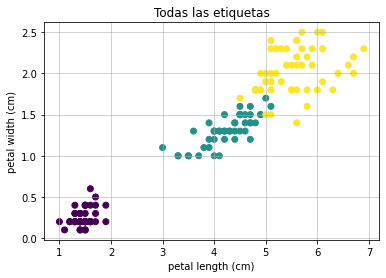

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
print(df_iris.head())
etiquetas = df_iris['target'].unique()
print(etiquetas)
hist_max,bin_edges = np.histogram(df_iris['target'], bins=3, range=(0, 3))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=df_iris["target"])
plt.grid(axis="both", alpha=0.7)
plt.title("Todas las etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")



El libro propone primero realizar una clasificacion binaria utilizando un algoritmo de SVD. Para esto voy a hacer una division parecida a la que hice en el capitulo 3 (cuando clasifique 5 y no 5). En este caso voy a considerar las etiquetas correspondientes a 2 y las que no son dos. La etiqueta 2 se corresponde con la flor "Iris virginica".


Text(0.5, 1.0, 'Etiquetas')

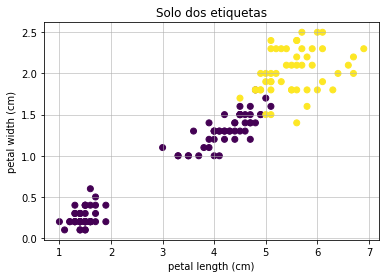

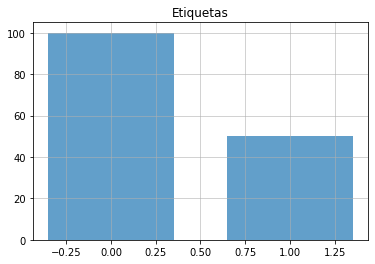

In [49]:
y = (df_iris["target"] == 2).astype(np.float64)
plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=y)
plt.grid(axis="both", alpha=0.7)
plt.title("Solo dos etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.figure()
hist_max,bin_edges = np.histogram(y, bins=2, range=(0, 2))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

Armo el dataset mas ordenado y uso el clasificador SVM.